# Load Libraries and Datasets

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [73]:
df_train = pd.read_csv('ticdata2000.txt', delim_whitespace= True, header=None)
df_test = pd.read_csv('ticeval2000.txt', delim_whitespace= True, header=None)
df_target_variable = pd.read_csv('tictgts2000.txt', delim_whitespace= True, header=None)

In [75]:
# Column names被儲存在另一個檔案
df_train.columns = ['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD', 'MGODRK', 'MGODPR','MGODOV','MGODGE','MRELGE', 'MRELSA',
                                    'MRELOV','MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER',
                                    'MBERMIDD','MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2',
                                    'MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART',
                                    'PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN',
                                    'PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR',
                                    'AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG',
                                    'AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND','CARAVAN']

df_train

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,2,6,5,3,2,2,5,2,2,0,0,4,1,3,2,3,3,3,0,9,0,5,1,3,5,4,4,3,3,0,0,3,3,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,0,3,2,2,5,0,0,9,2,1,1,3,3,2,0,4,5,0,0,3,6,6,1,2,6,3,0,9,0,0,0,4,5,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,1,4,3,3,4,0,1,8,1,0,0,2,3,5,1,1,1,4,4,7,2,4,0,5,8,1,5,3,1,1,0,3,3,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,2,0,0,4,5,0,2,7,0,2,0,2,4,2,0,0,4,5,0,2,7,5,4,0,9,0,0,5,4,0,0,4,6,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
df_test = pd.concat([df_test, df_target_variable], axis = 1)
df_test.columns = ['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD', 'MGODRK', 'MGODPR','MGODOV','MGODGE','MRELGE', 'MRELSA',
                                    'MRELOV','MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER',
                                    'MBERMIDD','MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2',
                                    'MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART',
                                    'PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN',
                                    'PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR',
                                    'AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG',
                                    'AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND','CARAVAN']

df_test

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,4,2,8,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,0,6,8,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,4,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1
2,39,1,3,3,9,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,0,3,5,2,0,0,6,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,0,4,4,2,0,0,5,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,33,1,2,4,8,0,7,2,0,5,2,2,2,6,2,0,3,6,5,0,0,1,0,4,2,0,2,4,2,4,5,4,4,2,3,6,3,6,0,0,0,2,3,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3996,24,1,2,3,5,1,5,1,3,4,2,4,4,4,2,2,4,4,2,0,0,3,3,3,1,1,2,5,1,7,2,6,0,3,7,2,3,3,2,2,0,4,2,0,0,0,6,0,0,0,0,0,0,0,6,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3997,36,1,2,3,8,1,5,1,3,7,0,2,2,5,3,2,3,4,2,0,0,3,4,2,1,1,3,5,0,7,2,6,1,2,6,3,2,5,3,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3998,33,1,3,3,8,1,4,2,3,7,1,2,2,3,4,1,3,5,1,1,1,2,3,3,2,2,2,4,1,4,5,6,2,2,7,2,1,4,4,1,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
#更改變數名稱（原為荷蘭語），幫助了解每個變數代表的意義
column_mapping = {
    'MOSTYPE': 'Customer Subtype',
    'MAANTHUI': 'Number of houses',
    'MGEMOMV': 'Avg size household',
    'MGEMLEEF': 'Avg age',
    'MOSHOOFD': 'Customer main type',
    'MGODRK': 'Roman catholic',
    'MGODPR': 'Protestant',
    'MGODOV': 'Other religion',
    'MGODGE': 'No religion',
    'MRELGE': 'Married',
    'MRELSA': 'Living together',
    'MRELOV': 'Other relation',
    'MFALLEEN': 'Singles',
    'MFGEKIND': 'Household without children',
    'MFWEKIND': 'Household with children',
    'MOPLHOOG': 'High level education',
    'MOPLMIDD': 'Medium level education',
    'MOPLLAAG': 'Lower level education',
    'MBERHOOG': 'High status',
    'MBERZELF': 'Entrepreneur',
    'MBERBOER': 'Farmer',
    'MBERMIDD': 'Middle management',
    'MBERARBG': 'Skilled labourers',
    'MBERARBO': 'Unskilled labourers',
    'MSKA': 'Social class A',
    'MSKB1': 'Social class B1',
    'MSKB2': 'Social class B2',
    'MSKC': 'Social class C',
    'MSKD': 'Social class D',
    'MHHUUR': 'Rented house',
    'MHKOOP': 'Home owners',
    'MAUT1': '1 car',
    'MAUT2': '2 cars',
    'MAUT0': 'No car',
    'MZFONDS': 'National Health Service',
    'MZPART': 'Private health insurance',
    'MINKM30': 'Income less than 30.000',
    'MINK3045': 'Income 30-45.000',
    'MINK4575': 'Income 45-75.000',
    'MINK7512': 'Income 75-122.000',
    'MINK123M': 'Income more than 123.000',
    'MINKGEM': 'Average income',
    'MKOOPKLA': 'Purchasing power class',
    'PWAPART': 'Contribution private third party insurance',
    'PWABEDR': 'Contribution third party insurance (firms)',
    'PWALAND': 'Contribution third party insurance (agriculture)',
    'PPERSAUT': 'Contribution car policies',
    'PBESAUT': 'Contribution delivery van policies',
    'PMOTSCO': 'Contribution motorcycle/scooter policies',
    'PVRAAUT': 'Contribution lorry policies',
    'PAANHANG': 'Contribution trailer policies',
    'PTRACTOR': 'Contribution tractor policies',
    'PWERKT': 'Contribution agricultural machines policies',
    'PBROM': 'Contribution moped policies',
    'PLEVEN': 'Contribution life insurances',
    'PPERSONG': 'Contribution private accident insurance policies',
    'PGEZONG': 'Contribution family accidents insurance policies',
    'PWAOREG': 'Contribution disability insurance policies',
    'PBRAND': 'Contribution fire policies',
    'PZEILPL': 'Contribution surfboard policies',
    'PPLEZIER': 'Contribution boat policies',
    'PFIETS': 'Contribution bicycle policies',
    'PINBOED': 'Contribution property insurance policies',
    'PBYSTAND': 'Contribution social security insurance policies',
    'AWAPART': 'Number of private third party insurance',
    'AWABEDR': 'Number of third party insurance (firms)',
    'AWALAND': 'Number of third party insurance (agriculture)',
    'APERSAUT': 'Number of car policies',
    'ABESAUT': 'Number of delivery van policies',
    'AMOTSCO': 'Number of motorcycle/scooter policies',
    'AVRAAUT': 'Number of lorry policies',
    'AAANHANG': 'Number of trailer policies',
    'ATRACTOR': 'Number of tractor policies',
    'AWERKT': 'Number of agricultural machines policies',
    'ABROM': 'Number of moped policies',
    'ALEVEN': 'Number of life insurances',
    'APERSONG': 'Number of private accident insurance policies',
    'AGEZONG': 'Number of family accidents insurance policies',
    'AWAOREG': 'Number of disability insurance policies',
    'ABRAND': 'Number of fire policies',
    'AZEILPL': 'Number of surfboard policies',
    'APLEZIER': 'Number of boat policies',
    'AFIETS': 'Number of bicycle policies',
    'AINBOED': 'Number of property insurance policies',
    'ABYSTAND': 'Number of social security insurance policies',
    'CARAVAN': 'Number of mobile home policies'
}

df_train = df_train.rename(columns=column_mapping)
df_test = df_test.rename(columns=column_mapping)

In [170]:
df_train.head()

,Number of houses,Avg size household,Avg age,Roman catholic,Protestant,Other religion,No religion,Married,Living together,Other relation,Singles,Household without children,Household with children,High level education,Medium level education,Lower level education,High status,Entrepreneur,Farmer,Middle management,Skilled labourers,Unskilled labourers,Social class A,Social class B1,Social class B2,Social class C,Social class D,Rented house,Home owners,1 car,2 cars,No car,National Health Service,Private health insurance,Income less than 30.000,Income 30-45.000,Income 45-75.000,Income 75-122.000,Income more than 123.000,Average income,Purchasing power class,Contribution private third party insurance,Contribution third party insurance (firms),Contribution third party insurance (agriculture),Contribution car policies,Contribution delivery van policies,Contribution motorcycle/scooter policies,Contribution lorry policies,Contribution trailer policies,Contribution tractor policies,Contribution agricultural machines policies,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution fire policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,Number of private third party insurance,Number of third party insurance (firms),Number of third party insurance (agriculture),Number of car policies,Number of delivery van policies,Number of motorcycle/scooter policies,Number of lorry policies,Number of trailer policies,Number of tractor policies,Number of agricultural machines policies,Number of moped policies,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies,Customer Subtype_2,Customer Subtype_3,Customer Subtype_4,Customer Subtype_5,Customer Subtype_6,Customer Subtype_7,Customer Subtype_8,Customer Subtype_9,Customer Subtype_10,Customer Subtype_11,Customer Subtype_12,Customer Subtype_13,Customer Subtype_15,Customer Subtype_16,Customer Subtype_17,Customer Subtype_18,Customer Subtype_19,Customer Subtype_20,Customer Subtype_21,Customer Subtype_22,Customer Subtype_23,Customer Subtype_24,Customer Subtype_25,Customer Subtype_26,Customer Subtype_27,Customer Subtype_28,Customer Subtype_29,Customer Subtype_30,Customer Subtype_31,Customer Subtype_32,Customer Subtype_33,Customer Subtype_34,Customer Subtype_35,Customer Subtype_36,Customer Subtype_37,Customer Subtype_38,Customer Subtype_39,Customer Subtype_40,Customer Subtype_41,Customer main type_2,Customer main type_3,Customer main type_4,Customer main type_5,Customer main type_6,Customer main type_7,Customer main type_8,Customer main type_9,Customer main type_10
0,1,3,2,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,2,2,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2,2,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,

#Explorary Data Analysis (EDA)

##Basic Check

Number of mobile home policies
0    5474
1     348
Name: count, dtype: int64
Number of mobile home policies
0    0.940227
1    0.059773
Name: proportion, dtype: float64


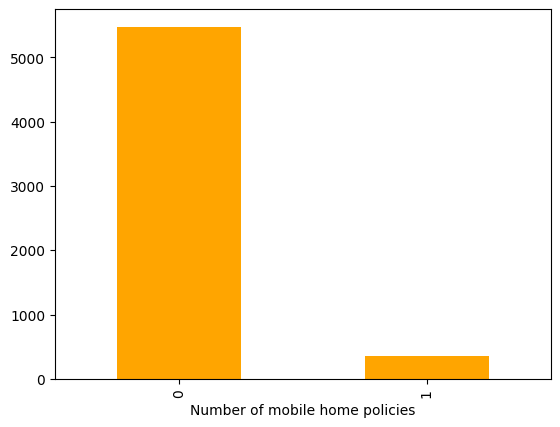

In [211]:
# Check if the target variable is balanced
df_train['Number of mobile home policies'].value_counts().plot(kind='bar', color = 'orange')

# print class number and percentages
print(df_train['Number of mobile home policies'].value_counts())
print(df_train['Number of mobile home policies'].value_counts(normalize=True))

我們發現只有大概 6% 的人有購買房車保險，目標變數類別非常的不平衡，需要處理資料不平衡的問題

In [80]:
# Check if there are any missing values
df_train.isnull().sum().sum()

0

沒有任何缺失值

##Numerical Variables

In [171]:
# Note: Age group, Avg Income group 屬於 ordinal variables
# 為了繪製correlation matrix，也將目標變數加入

numerical_variables = ['Number of houses', 'Avg size household', 'Number of private third party insurance', 'Number of third party insurance (firms)',
                       'Number of third party insurance (agriculture)', 'Number of car policies', 'Number of delivery van policies', 'Number of motorcycle/scooter policies',
                       'Number of lorry policies', 'Number of trailer policies', 'Number of tractor policies', 'Number of agricultural machines policies', 'Number of moped policies',
                       'Number of life insurances', 'Number of private accident insurance policies', 'Number of family accidents insurance policies', 'Number of disability insurance policies',
                       'Number of fire policies', 'Number of surfboard policies', 'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies',
                       'Number of social security insurance policies', 'Number of mobile home policies']

df_train_numerical = df_train[numerical_variables]

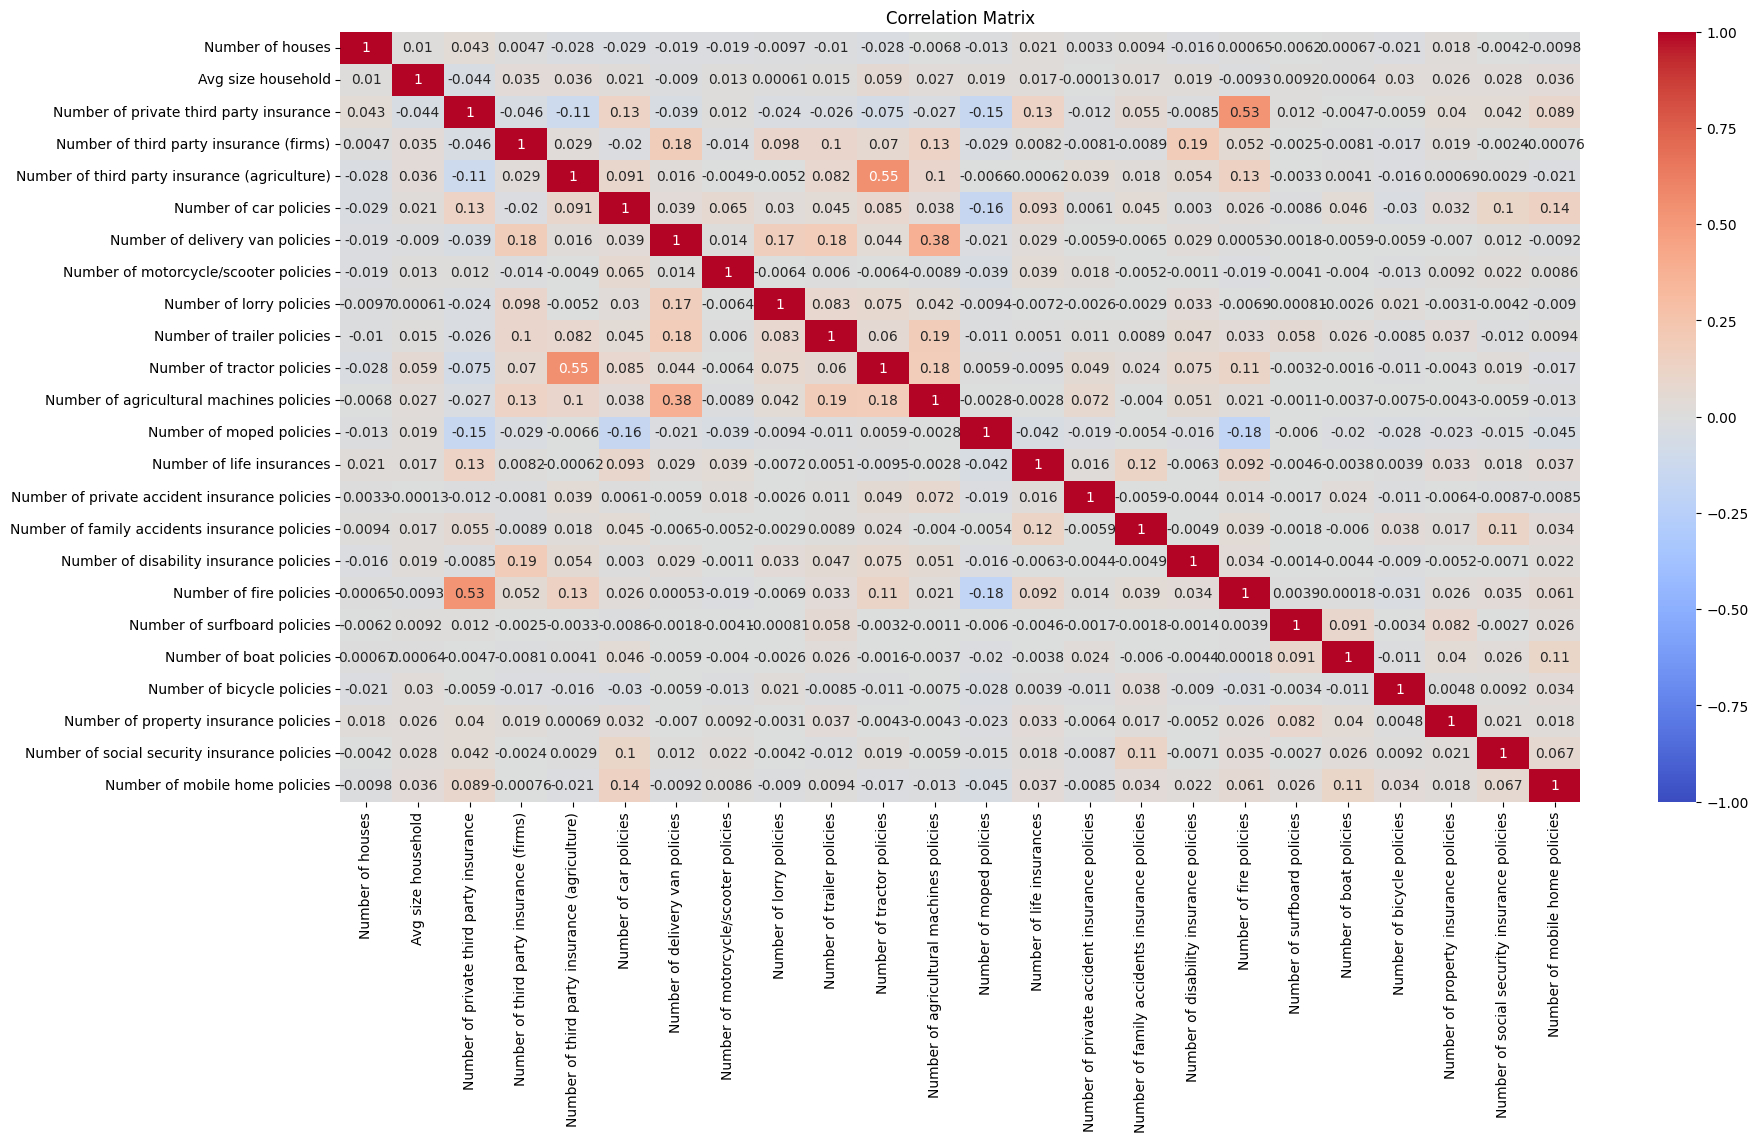

In [175]:
#correlation matrix
corr_matrix = df_train_numerical.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

plt.show()


發現所有Numerical Variables與目標變數的相關性很低，這些特徵對後續模型的幫助可能不大

##Nominal Variables

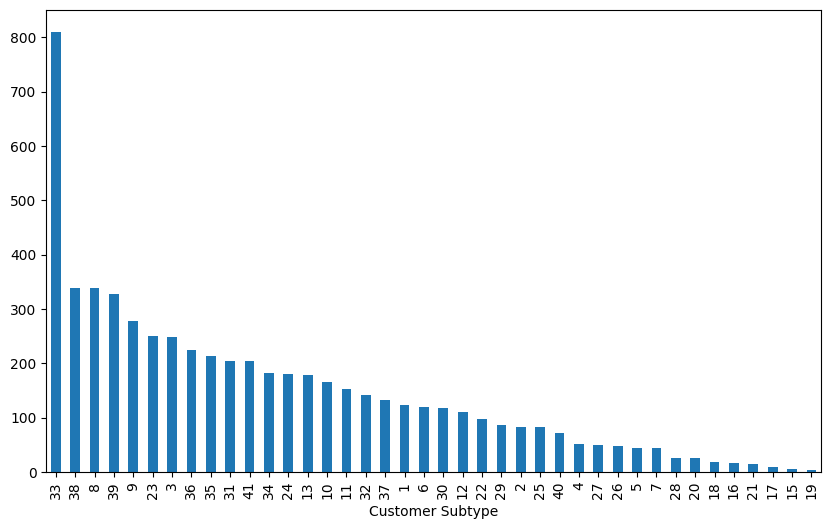

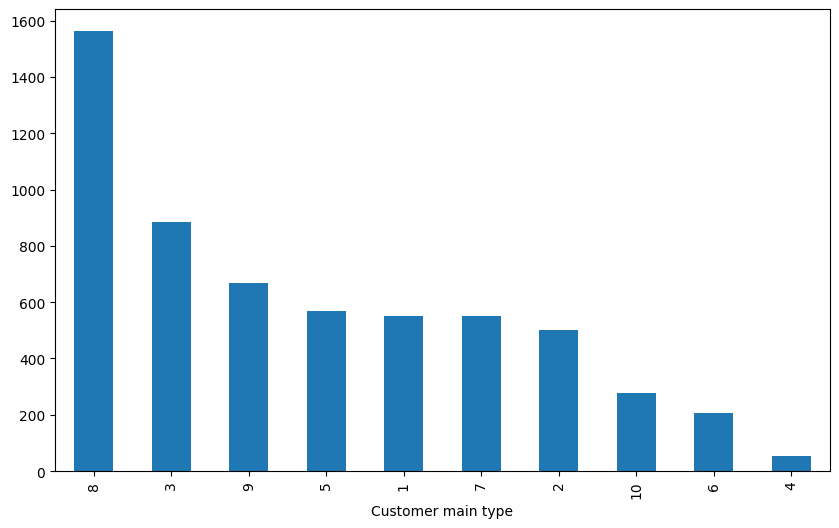

In [83]:
# 觀看這兩個變數的分佈情況
nominal_variables = ['Customer Subtype', 'Customer main type']

# Create bar charts for nominal variables
for i in nominal_variables:
    plt.figure(figsize=(10, 6))
    df_train[i].value_counts().plot(kind='bar')
    plt.show()

##Ordinal Variables

In [84]:
#ordinal_variables = all variables - numerical variables - nominal varaibles
ordinal_variables = df_train.drop(columns = numerical_variables + nominal_variables).columns
ordinal_variables

Index(['Avg age', 'Roman catholic', 'Protestant', 'Other religion',
       'No religion', 'Married', 'Living together', 'Other relation',
       'Singles', 'Household without children', 'Household with children',
       'High level education', 'Medium level education',
       'Lower level education', 'High status', 'Entrepreneur', 'Farmer',
       'Middle management', 'Skilled labourers', 'Unskilled labourers',
       'Social class A', 'Social class B1', 'Social class B2',
       'Social class C', 'Social class D', 'Rented house', 'Home owners',
       '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income less than 30.000',
       'Income 30-45.000', 'Income 45-75.000', 'Income 75-122.000',
       'Income more than 123.000', 'Average income', 'Purchasing power class',
       'Contribution private third party insurance',
       'Contribution third party insurance (firms)',
       'Contribution third party insurance (agriculture)',
       'Con

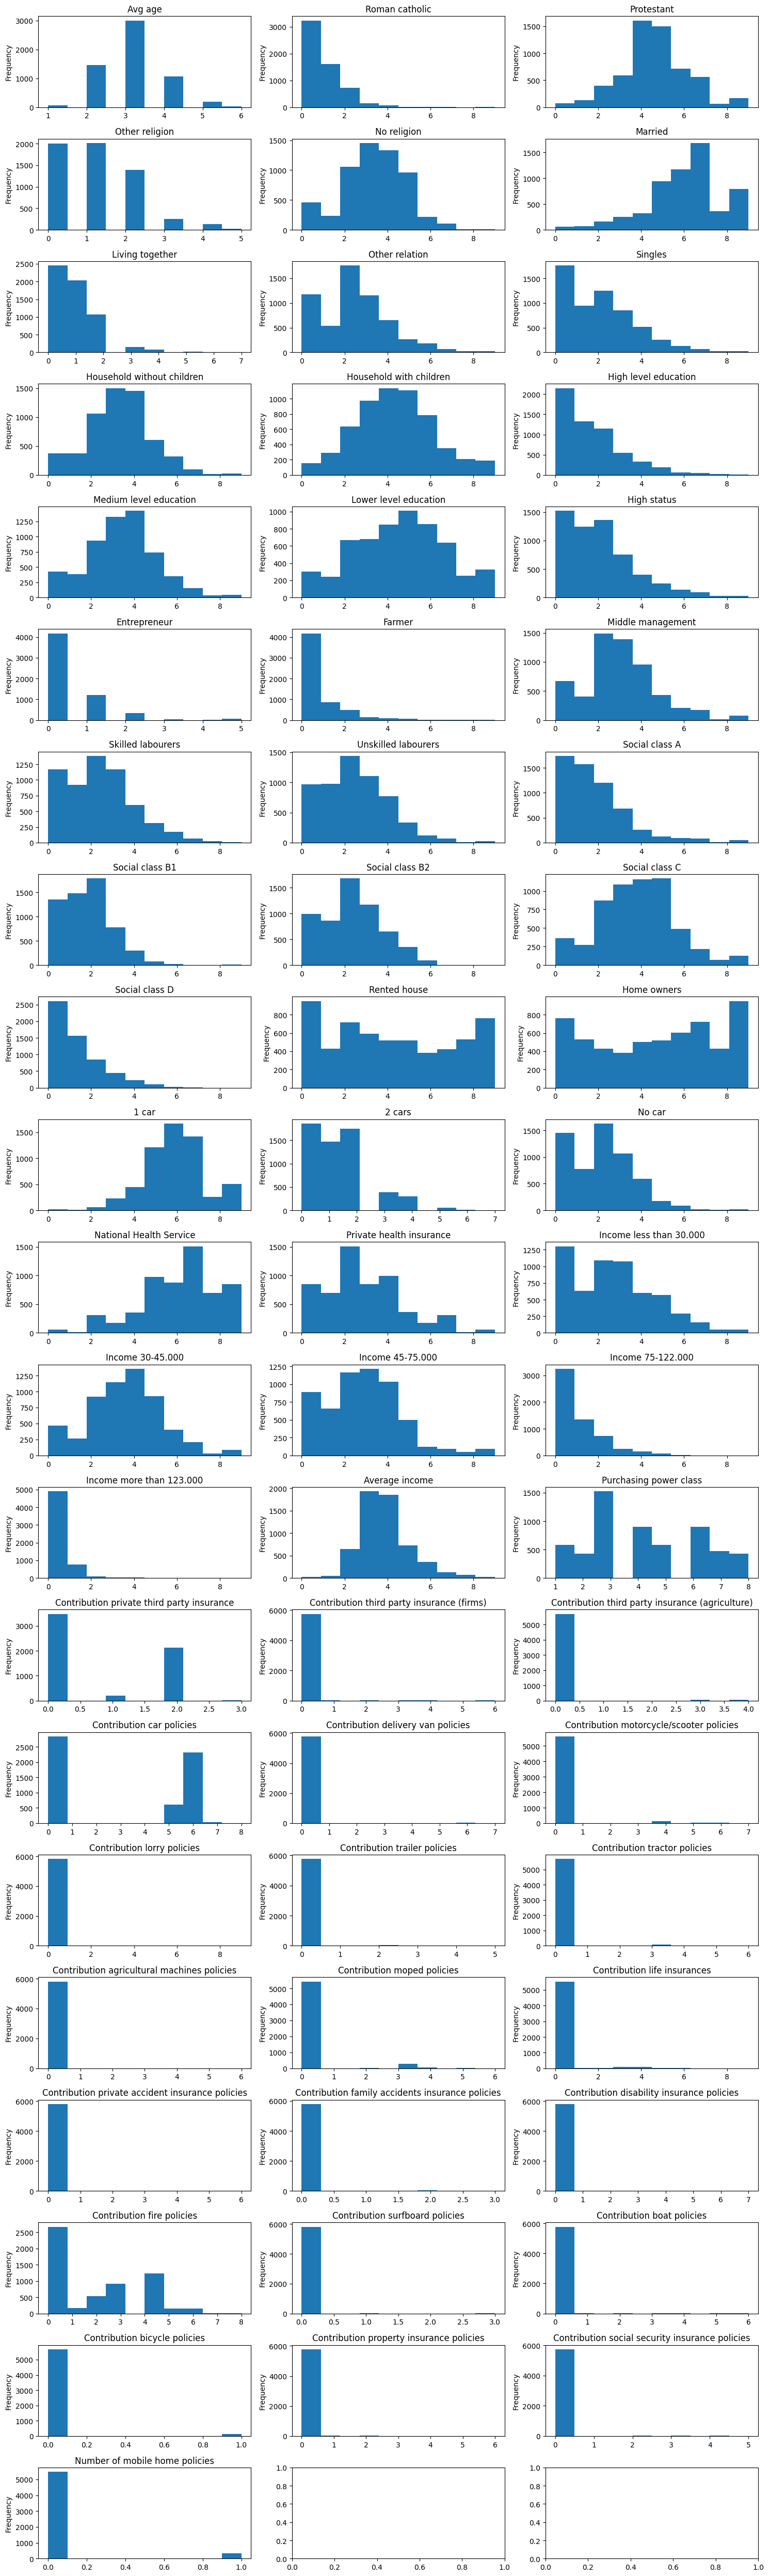

In [85]:
# 觀看Ordinal variables的分佈情況
#create histograms for Ordinal variables

fig, axes = plt.subplots(nrows=21, ncols=3, figsize=(15, 50))

# Iterate over each variable
for i, variable in enumerate(ordinal_variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    df_train[variable].plot(kind='hist', ax=ax)
    ax.set_title(variable)
    plt.tight_layout()

plt.show()

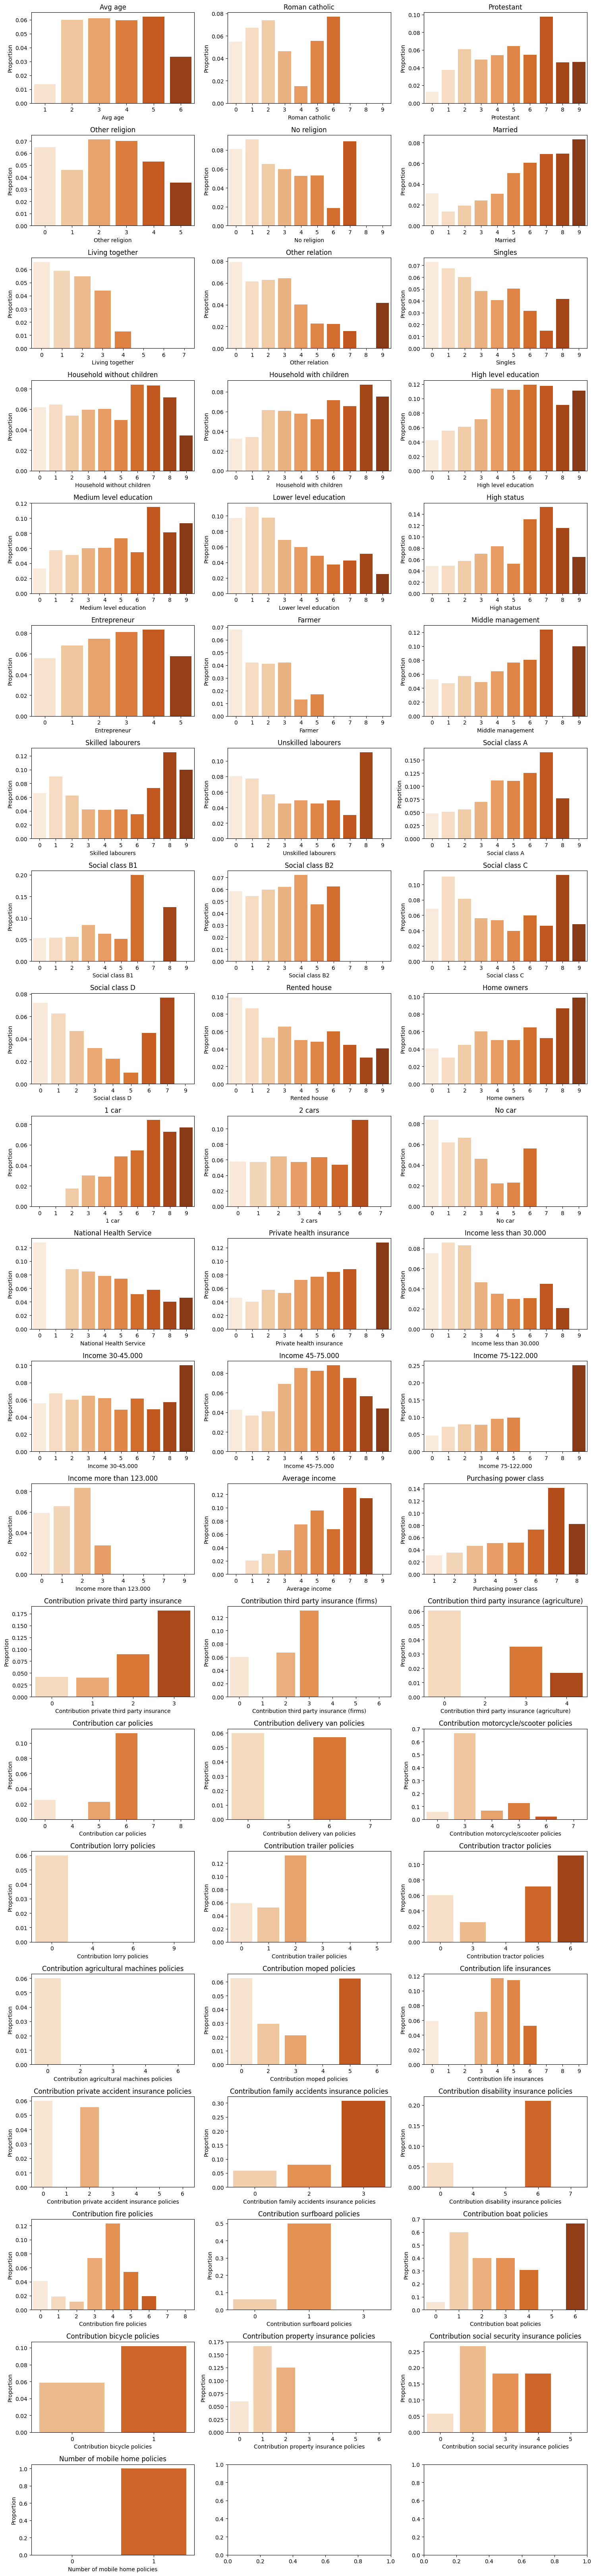

In [169]:
# 計算特徵中每個類別購買露營車保險的比例

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=21, ncols=3, figsize=(15, 65))

for i, variable in enumerate(ordinal_variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # 每個類別中購買露營保險的比例
    proportion = df_train.groupby(variable)['Number of mobile home policies'].mean()

    sns.barplot(x=proportion.index, y=proportion.values, ax=ax, palette='Oranges')

    ax.set_title(variable)
    ax.set_ylabel('Proportion')
    ax.set_xlabel(variable)

plt.tight_layout()
plt.show()


#Data Pre-processing

##Encode Nominal Variables

In [88]:
#print original dataset
df_train.head()

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,Living together,Other relation,Singles,Household without children,Household with children,High level education,Medium level education,Lower level education,High status,Entrepreneur,Farmer,Middle management,Skilled labourers,Unskilled labourers,Social class A,Social class B1,Social class B2,Social class C,Social class D,Rented house,Home owners,1 car,2 cars,No car,National Health Service,Private health insurance,Income less than 30.000,Income 30-45.000,Income 45-75.000,Income 75-122.000,Income more than 123.000,Average income,Purchasing power class,Contribution private third party insurance,Contribution third party insurance (firms),Contribution third party insurance (agriculture),Contribution car policies,Contribution delivery van policies,Contribution motorcycle/scooter policies,Contribution lorry policies,Contribution trailer policies,Contribution tractor policies,Contribution agricultural machines policies,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution fire policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,Number of private third party insurance,Number of third party insurance (firms),Number of third party insurance (agriculture),Number of car policies,Number of delivery van policies,Number of motorcycle/scooter policies,Number of lorry policies,Number of trailer policies,Number of tractor policies,Number of agricultural machines policies,Number of moped policies,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [89]:
# We want to encode two nominal variables, which are Customer Subtype and Customer main type
# Other categorical variables are not encoded because they are ordinal data (their orders have meaning)

# We use one-hot encoding
# 創建 n-1 個 dummy variables，因為其中一個變量可以由其他dummy variables組合得知

df_train = pd.get_dummies(df_train, columns=['Customer Subtype', 'Customer main type'], drop_first = True)
df_test = pd.get_dummies(df_test, columns=['Customer Subtype', 'Customer main type'], drop_first = True)

df_train.head()

,Number of houses,Avg size household,Avg age,Roman catholic,Protestant,Other religion,No religion,Married,Living together,Other relation,Singles,Household without children,Household with children,High level education,Medium level education,Lower level education,High status,Entrepreneur,Farmer,Middle management,Skilled labourers,Unskilled labourers,Social class A,Social class B1,Social class B2,Social class C,Social class D,Rented house,Home owners,1 car,2 cars,No car,National Health Service,Private health insurance,Income less than 30.000,Income 30-45.000,Income 45-75.000,Income 75-122.000,Income more than 123.000,Average income,Purchasing power class,Contribution private third party insurance,Contribution third party insurance (firms),Contribution third party insurance (agriculture),Contribution car policies,Contribution delivery van policies,Contribution motorcycle/scooter policies,Contribution lorry policies,Contribution trailer policies,Contribution tractor policies,Contribution agricultural machines policies,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution fire policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,Number of private third party insurance,Number of third party insurance (firms),Number of third party insurance (agriculture),Number of car policies,Number of delivery van policies,Number of motorcycle/scooter policies,Number of lorry policies,Number of trailer policies,Number of tractor policies,Number of agricultural machines policies,Number of moped policies,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies,Customer Subtype_2,Customer Subtype_3,Customer Subtype_4,Customer Subtype_5,Customer Subtype_6,Customer Subtype_7,Customer Subtype_8,Customer Subtype_9,Customer Subtype_10,Customer Subtype_11,Customer Subtype_12,Customer Subtype_13,Customer Subtype_15,Customer Subtype_16,Customer Subtype_17,Customer Subtype_18,Customer Subtype_19,Customer Subtype_20,Customer Subtype_21,Customer Subtype_22,Customer Subtype_23,Customer Subtype_24,Customer Subtype_25,Customer Subtype_26,Customer Subtype_27,Customer Subtype_28,Customer Subtype_29,Customer Subtype_30,Customer Subtype_31,Customer Subtype_32,Customer Subtype_33,Customer Subtype_34,Customer Subtype_35,Customer Subtype_36,Customer Subtype_37,Customer Subtype_38,Customer Subtype_39,Customer Subtype_40,Customer Subtype_41,Customer main type_2,Customer main type_3,Customer main type_4,Customer main type_5,Customer main type_6,Customer main type_7,Customer main type_8,Customer main type_9,Customer main type_10
0,1,3,2,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,1,2,2,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,F

In [90]:
df_train.replace({True: 1, False: 0}, inplace = True)
df_test.replace({True: 1, False: 0}, inplace =True)
df_train

# Now we have 132 variables

,Number of houses,Avg size household,Avg age,Roman catholic,Protestant,Other religion,No religion,Married,Living together,Other relation,Singles,Household without children,Household with children,High level education,Medium level education,Lower level education,High status,Entrepreneur,Farmer,Middle management,Skilled labourers,Unskilled labourers,Social class A,Social class B1,Social class B2,Social class C,Social class D,Rented house,Home owners,1 car,2 cars,No car,National Health Service,Private health insurance,Income less than 30.000,Income 30-45.000,Income 45-75.000,Income 75-122.000,Income more than 123.000,Average income,Purchasing power class,Contribution private third party insurance,Contribution third party insurance (firms),Contribution third party insurance (agriculture),Contribution car policies,Contribution delivery van policies,Contribution motorcycle/scooter policies,Contribution lorry policies,Contribution trailer policies,Contribution tractor policies,Contribution agricultural machines policies,Contribution moped policies,Contribution life insurances,Contribution private accident insurance policies,Contribution family accidents insurance policies,Contribution disability insurance policies,Contribution fire policies,Contribution surfboard policies,Contribution boat policies,Contribution bicycle policies,Contribution property insurance policies,Contribution social security insurance policies,Number of private third party insurance,Number of third party insurance (firms),Number of third party insurance (agriculture),Number of car policies,Number of delivery van policies,Number of motorcycle/scooter policies,Number of lorry policies,Number of trailer policies,Number of tractor policies,Number of agricultural machines policies,Number of moped policies,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies,Customer Subtype_2,Customer Subtype_3,Customer Subtype_4,Customer Subtype_5,Customer Subtype_6,Customer Subtype_7,Customer Subtype_8,Customer Subtype_9,Customer Subtype_10,Customer Subtype_11,Customer Subtype_12,Customer Subtype_13,Customer Subtype_15,Customer Subtype_16,Customer Subtype_17,Customer Subtype_18,Customer Subtype_19,Customer Subtype_20,Customer Subtype_21,Customer Subtype_22,Customer Subtype_23,Customer Subtype_24,Customer Subtype_25,Customer Subtype_26,Customer Subtype_27,Customer Subtype_28,Customer Subtype_29,Customer Subtype_30,Customer Subtype_31,Customer Subtype_32,Customer Subtype_33,Customer Subtype_34,Customer Subtype_35,Customer Subtype_36,Customer Subtype_37,Customer Subtype_38,Customer Subtype_39,Customer Subtype_40,Customer Subtype_41,Customer main type_2,Customer main type_3,Customer main type_4,Customer main type_5,Customer main type_6,Customer main type_7,Customer main type_8,Customer main type_9,Customer main type_10
0,1,3,2,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,2,2,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2,2,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,

##Separate Features and the Target Variable

In [91]:
X_train = df_train.drop(columns = 'Number of mobile home policies')
y_train = df_train['Number of mobile home policies']

X_test = df_test.drop(columns = 'Number of mobile home policies')
y_test = df_test['Number of mobile home policies']

##Standarisation

In [92]:
# Use StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#建立常用Function

In [95]:
#使用Cross-validation驗證模型能力，以Recall挑選最佳模型
#這個function沒有使用Resample方法

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from lightgbm import LGBMClassifier

def get_performance(model, X_train, y_train):
    # Create a StratifiedKFold object with 5 splits
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    recall = cross_val_score(model, X_train, y_train, cv=skf, scoring='recall')

    f1_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1')

    # calculate mean Recall
    mean_recall = recall.mean()
    # calculate mean f1 score
    mean_f1 = f1_scores.mean()

    print(f'{model.__class__.__name__} Mean Recall: {mean_recall:.4f}')
    print(f'{model.__class__.__name__} Mean F1 score: {mean_f1:.4f}')
    print('-'*100)

In [23]:
#一樣使用Cross-validation驗證模型能力，以Recall挑選最佳模型
#這個function有使用Resample方法

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def get_performance_resampling(model, X_train, y_train, sampling_method):
    # Create a StratifiedKFold object with 5 splits
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Create a pipeline with sampling and model
    pipeline = Pipeline([('sampling', sampling_method), ('model', model)])

    # Calculate Recall
    recall_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='recall')

    # Calculate F1 Score
    f1_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='f1')

    # Calculate mean Recall and mean F1 Score
    mean_recall = recall_scores.mean()
    mean_f1 = f1_scores.mean()

    print(f'{model.__class__.__name__} Mean Recall: {mean_recall:.4f}')
    print(f'{model.__class__.__name__} Mean F1 Score: {mean_f1:.4f}')
    print('-'*100)

In [24]:
# Create a function to get several metrics
# 這是給最後測試集用的

def get_metrics(y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    #Calculate Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", confusion)

    #Calculate Precision, Recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)


#Create a function to get ROC/AUC plot
def get_plot(y_prob):
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    print("ROC AUC Score:", roc_auc)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

#(1) 使用不同抽樣方法

##1. Modeling without Resampling

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
LR = LogisticRegression(random_state = 24)
get_performance(LR, X_train, y_train)

# Random Forest
RF = RandomForestClassifier(random_state = 24)
get_performance(RF, X_train, y_train)

# LightGBM
lgbm = LGBMClassifier(random_state = 24, verbose = -1)
get_performance(lgbm, X_train, y_train)

# XGBoost
xgb = XGBClassifier(random_state = 24, verbose = -1)
get_performance(xgb, X_train, y_train)

# KNN
knn = KNeighborsClassifier()
get_performance(knn, X_train, y_train)

# MLP
MLP = MLPClassifier(hidden_layer_sizes=(30, 10), max_iter=1000, random_state=24)
get_performance(MLP, X_train, y_train)

LogisticRegression Mean Recall: 0.0173
LogisticRegression Mean F1 score: 0.0326
----------------------------------------------------------------------------------------------------
RandomForestClassifier Mean Recall: 0.0460
RandomForestClassifier Mean F1 score: 0.0712
----------------------------------------------------------------------------------------------------
LGBMClassifier Mean Recall: 0.0603
LGBMClassifier Mean F1 score: 0.0946
----------------------------------------------------------------------------------------------------
XGBClassifier Mean Recall: 0.0690
XGBClassifier Mean F1 score: 0.1014
----------------------------------------------------------------------------------------------------
KNeighborsClassifier Mean Recall: 0.0144
KNeighborsClassifier Mean F1 score: 0.0258
----------------------------------------------------------------------------------------------------
MLPClassifier Mean Recall: 0.1093
MLPClassifier Mean F1 score: 0.1211
-------------------------------

##2. Modeling with Random Oversampling

In [26]:
# Random oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# 僅觀察取樣後比例
y_train_ros.value_counts()

# 實際取樣是在交叉驗證過程中執行，才不會造成資料外洩

,count
Number of mobile home policies,
0,5474
1,5474


In [97]:
# Logistic Regression
LR = LogisticRegression(random_state = 24)
get_performance_resampling(LR, X_train, y_train, ros)

# Random Forest
RF = RandomForestClassifier(random_state = 24)
get_performance_resampling(RF, X_train, y_train, ros)

# LightGBM
lgbm = LGBMClassifier(random_state = 24, verbose = -1)
get_performance_resampling(lgbm, X_train, y_train, ros)

# XGBoost
xgb = XGBClassifier(random_state = 24, verbose = -1)
get_performance_resampling(xgb, X_train, y_train, ros)

# KNN
knn = KNeighborsClassifier()
get_performance_resampling(knn, X_train, y_train, ros)

# MLP
MLP = MLPClassifier(hidden_layer_sizes=(30, 10), max_iter=1000, random_state=24)
get_performance_resampling(MLP, X_train, y_train, ros)

LogisticRegression Mean Recall: 0.5889
LogisticRegression Mean F1 Score: 0.1898
----------------------------------------------------------------------------------------------------
RandomForestClassifier Mean Recall: 0.0949
RandomForestClassifier Mean F1 Score: 0.1166
----------------------------------------------------------------------------------------------------
LGBMClassifier Mean Recall: 0.2670
LGBMClassifier Mean F1 Score: 0.2046
----------------------------------------------------------------------------------------------------
XGBClassifier Mean Recall: 0.2040
XGBClassifier Mean F1 Score: 0.1759
----------------------------------------------------------------------------------------------------
KNeighborsClassifier Mean Recall: 0.2787
KNeighborsClassifier Mean F1 Score: 0.1484
----------------------------------------------------------------------------------------------------
MLPClassifier Mean Recall: 0.1983
MLPClassifier Mean F1 Score: 0.1696
-------------------------------

##3. Modeling with Random Undersampling

In [28]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# 僅觀察取樣後比例
y_train_rus.value_counts()

# 實際取樣是在交叉驗證過程中執行，才不會造成資料外洩

,count
Number of mobile home policies,
0,348
1,348


In [98]:
# Logistic Regression
LR = LogisticRegression(random_state = 24)
get_performance_resampling(LR, X_train, y_train, rus)

# Random Forest
RF = RandomForestClassifier(random_state = 24)
get_performance_resampling(RF, X_train, y_train, rus)

# LightGBM
lgbm = LGBMClassifier(random_state = 24, verbose = -1)
get_performance_resampling(lgbm, X_train, y_train, rus)

# XGBoost
xgb = XGBClassifier(random_state = 24, verbose = -1)
get_performance_resampling(xgb, X_train, y_train, rus)

# KNN
knn = KNeighborsClassifier()
get_performance_resampling(knn, X_train, y_train, rus)

# MLP
MLP = MLPClassifier(hidden_layer_sizes=(30, 10), max_iter=1000, random_state=24)
get_performance_resampling(MLP, X_train, y_train, rus)

LogisticRegression Mean Recall: 0.6694
LogisticRegression Mean F1 Score: 0.1836
----------------------------------------------------------------------------------------------------
RandomForestClassifier Mean Recall: 0.6465
RandomForestClassifier Mean F1 Score: 0.1904
----------------------------------------------------------------------------------------------------
LGBMClassifier Mean Recall: 0.6349
LGBMClassifier Mean F1 Score: 0.1816
----------------------------------------------------------------------------------------------------
XGBClassifier Mean Recall: 0.6607
XGBClassifier Mean F1 Score: 0.1876
----------------------------------------------------------------------------------------------------
KNeighborsClassifier Mean Recall: 0.6694
KNeighborsClassifier Mean F1 Score: 0.1609
----------------------------------------------------------------------------------------------------
MLPClassifier Mean Recall: 0.6495
MLPClassifier Mean F1 Score: 0.1647
-------------------------------

##4. Modeling with SMOTE

In [30]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 僅觀察取樣後比例
y_train_smote.value_counts()

# 實際取樣是在交叉驗證過程中執行，才不會造成資料外洩

,count
Number of mobile home policies,
0,5474
1,5474


In [99]:
# Logistic Regression
LR = LogisticRegression(random_state = 24)
get_performance_resampling(LR, X_train, y_train, smote)

# Random Forest
RF = RandomForestClassifier(random_state = 24)
get_performance_resampling(RF, X_train, y_train, smote)

# LightGBM
lgbm = LGBMClassifier(random_state = 24, verbose = -1)
get_performance_resampling(lgbm, X_train, y_train, smote)

# XGBoost
xgb = XGBClassifier(random_state = 24, verbose = -1)
get_performance_resampling(xgb, X_train, y_train, smote)

# KNN
knn = KNeighborsClassifier()
get_performance_resampling(knn, X_train, y_train, smote)

# MLP
MLP = MLPClassifier(hidden_layer_sizes=(30, 10), max_iter=1000, random_state=24)
get_performance_resampling(MLP, X_train, y_train, smote)

LogisticRegression Mean Recall: 0.1781
LogisticRegression Mean F1 Score: 0.1635
----------------------------------------------------------------------------------------------------
RandomForestClassifier Mean Recall: 0.0805
RandomForestClassifier Mean F1 Score: 0.0967
----------------------------------------------------------------------------------------------------
LGBMClassifier Mean Recall: 0.1092
LGBMClassifier Mean F1 Score: 0.1425
----------------------------------------------------------------------------------------------------
XGBClassifier Mean Recall: 0.0920
XGBClassifier Mean F1 Score: 0.1143
----------------------------------------------------------------------------------------------------
KNeighborsClassifier Mean Recall: 0.3160
KNeighborsClassifier Mean F1 Score: 0.1585
----------------------------------------------------------------------------------------------------
MLPClassifier Mean Recall: 0.1408
MLPClassifier Mean F1 Score: 0.1450
-------------------------------

##5. Modeling with SMOTE + Tomek Links

In [32]:
# SMOTETomek
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

# 僅觀察取樣後比例
y_train_smt.value_counts()

# 實際取樣是在交叉驗證過程中執行，才不會造成資料外洩

,count
Number of mobile home policies,
0,5397
1,5397


In [100]:
# Logistic Regression
LR = LogisticRegression(random_state = 24)
get_performance_resampling(LR, X_train, y_train, smt)

# Random Forest
RF = RandomForestClassifier(random_state = 24)
get_performance_resampling(RF, X_train, y_train, smt)

# LightGBM
lgbm = LGBMClassifier(random_state = 24, verbose = -1)
get_performance_resampling(lgbm, X_train, y_train, smt)

# XGBoost
xgb = XGBClassifier(random_state = 24, verbose = -1)
get_performance_resampling(xgb, X_train, y_train, smt)

# KNN
knn = KNeighborsClassifier()
get_performance_resampling(knn, X_train, y_train, smt)

# MLP
MLP = MLPClassifier(hidden_layer_sizes=(30, 10), max_iter=1000, random_state=24)
get_performance_resampling(MLP, X_train, y_train, smt)

LogisticRegression Mean Recall: 0.2039
LogisticRegression Mean F1 Score: 0.1769
----------------------------------------------------------------------------------------------------
RandomForestClassifier Mean Recall: 0.0777
RandomForestClassifier Mean F1 Score: 0.0966
----------------------------------------------------------------------------------------------------
LGBMClassifier Mean Recall: 0.0920
LGBMClassifier Mean F1 Score: 0.1221
----------------------------------------------------------------------------------------------------
XGBClassifier Mean Recall: 0.0949
XGBClassifier Mean F1 Score: 0.1267
----------------------------------------------------------------------------------------------------
KNeighborsClassifier Mean Recall: 0.3217
KNeighborsClassifier Mean F1 Score: 0.1562
----------------------------------------------------------------------------------------------------
MLPClassifier Mean Recall: 0.1179
MLPClassifier Mean F1 Score: 0.1238
-------------------------------

##6. Modeling with SMOTEENN

In [34]:
#SMOTEENN
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

# 僅觀察取樣後比例
# 實際取樣是在交叉驗證過程中執行，才不會造成資料外洩

In [101]:
# Logistic Regression
LR = LogisticRegression(random_state = 24)
get_performance_resampling(LR, X_train, y_train, smote_enn)

# Random Forest
RF = RandomForestClassifier(random_state = 24)
get_performance_resampling(RF, X_train, y_train, smote_enn)

# LightGBM
lgbm = LGBMClassifier(random_state = 24, verbose = -1)
get_performance_resampling(lgbm, X_train, y_train, smote_enn)

# XGBoost
xgb = XGBClassifier(random_state = 24, verbose = -1)
get_performance_resampling(xgb, X_train, y_train, smote_enn)

# KNN
knn = KNeighborsClassifier()
get_performance_resampling(knn, X_train, y_train, smote_enn)

# MLP
MLP = MLPClassifier(hidden_layer_sizes=(30, 10), max_iter=1000, random_state=24)
get_performance_resampling(MLP, X_train, y_train, smote_enn)

LogisticRegression Mean Recall: 0.2844
LogisticRegression Mean F1 Score: 0.1947
----------------------------------------------------------------------------------------------------
RandomForestClassifier Mean Recall: 0.2128
RandomForestClassifier Mean F1 Score: 0.1677
----------------------------------------------------------------------------------------------------
LGBMClassifier Mean Recall: 0.2154
LGBMClassifier Mean F1 Score: 0.1804
----------------------------------------------------------------------------------------------------
XGBClassifier Mean Recall: 0.2328
XGBClassifier Mean F1 Score: 0.1819
----------------------------------------------------------------------------------------------------
KNeighborsClassifier Mean Recall: 0.4942
KNeighborsClassifier Mean F1 Score: 0.1715
----------------------------------------------------------------------------------------------------
MLPClassifier Mean Recall: 0.2326
MLPClassifier Mean F1 Score: 0.1736
-------------------------------

#(2) 使用 Imbalanced-learn library 裡的集成模型

##BalancedRandomForestClassifier

In [54]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(random_state = 24)
get_performance(brf, X_train, y_train)

BalancedRandomForestClassifier(random_state=24) Mean Recall: 0.6378
BalancedRandomForestClassifier(random_state=24) Mean F1 score: 0.1989
----------------------------------------------------------------------------------------------------


##EasyEnsemble Classifier --> Best so far

In [49]:
#EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(random_state = 24)
get_performance(eec, X_train, y_train)

EasyEnsembleClassifier(random_state=24) Mean Recall: 0.7185
EasyEnsembleClassifier(random_state=24) Mean F1 score: 0.2177
----------------------------------------------------------------------------------------------------


##RUSBoost

In [61]:
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(random_state = 24)
get_performance(rusboost, X_train, y_train)

RUSBoostClassifier(random_state=24) Mean Recall: 0.5488
RUSBoostClassifier(random_state=24) Mean F1 score: 0.1834
----------------------------------------------------------------------------------------------------


##BalancedBaggingClassifier

In [64]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(random_state = 24)
get_performance(bbc, X_train, y_train)

BalancedBaggingClassifier(random_state=24) Mean Recall: 0.4742
BalancedBaggingClassifier(random_state=24) Mean F1 score: 0.2080
----------------------------------------------------------------------------------------------------


#(3) 調整類別權重

## Logistic Regression 對少數類別加權

In [105]:
# Logistic Regression
LR = LogisticRegression(class_weight = 'balanced', random_state = 24)
get_performance(LR, X_train, y_train)

LogisticRegression Mean Recall: 0.6063
LogisticRegression Mean F1 score: 0.1935
----------------------------------------------------------------------------------------------------


##Random Forest 對少數類別加權

In [103]:
# Random Forest
RF = RandomForestClassifier(class_weight = 'balanced', random_state = 24)
get_performance(RF, X_train, y_train)

RF = RandomForestClassifier(class_weight = {0:1, 1:10}, random_state = 24)
get_performance(RF, X_train, y_train)

RandomForestClassifier Mean Recall: 0.0546
RandomForestClassifier Mean F1 score: 0.0812
----------------------------------------------------------------------------------------------------
RandomForestClassifier Mean Recall: 0.0575
RandomForestClassifier Mean F1 score: 0.0857
----------------------------------------------------------------------------------------------------


##LightGBM Classifier 對少數類別加權

In [104]:
#LGBM
lgbm = LGBMClassifier(class_weight = 'balanced', random_state = 24, verbose = -1)
get_performance(lgbm, X_train, y_train)

LGBMClassifier Mean Recall: 0.2701
LGBMClassifier Mean F1 score: 0.2022
----------------------------------------------------------------------------------------------------


##XGBoost 對少數類別加權

In [116]:
# 計算正負樣本數量
num_negative = len(df_train[df_train['Number of mobile home policies'] == 0])
num_positive = len(df_train[df_train['Number of mobile home policies'] == 1])
scale_pos_weight = num_negative/num_positive

# XGBoost
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state = 24, verbose = -1)
get_performance(xgb, X_train, y_train)

XGBClassifier Mean Recall: 0.0690
XGBClassifier Mean F1 score: 0.1014
----------------------------------------------------------------------------------------------------
XGBClassifier Mean Recall: 0.2039
XGBClassifier Mean F1 score: 0.1737
----------------------------------------------------------------------------------------------------


# Stratified Cross-Validation調整超參數

##EasyEnsemble Classifier --> Best (同時考慮Recall與F1 score）

In [150]:
from sklearn.model_selection import GridSearchCV

eec = EasyEnsembleClassifier(random_state=24)

param_grid = {
    'n_estimators': [10, 50],
    'sampling_strategy': ['auto', 0.5, 0.75],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Set GridSearchCV
grid_search = GridSearchCV(estimator=eec, param_grid=param_grid, cv=skf, scoring='recall', n_jobs=-1)

# Search
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Recall Score: {grid_search.best_score_:.4f}')

# get the best model
eec_best_model = grid_search.best_estimator_
eec_best_model.fit(X_train, y_train)

# test on testing dataset
y_pred_eec = eec_best_model.predict(X_test)

# Predict probabilities for the positive class
y_prob_eec = eec_best_model.predict_proba(X_test)[:, 1]

Best Parameters: {'n_estimators': 50, 'sampling_strategy': 'auto'}
Best Recall Score: 0.7269


Accuracy: 0.68625
Confusion Matrix:
 [[2587 1175]
 [  80  158]]
Precision: 0.11852963240810202
Recall: 0.6638655462184874
F1 Score: 0.2011457670273711
ROC AUC Score: 0.7264479156894017


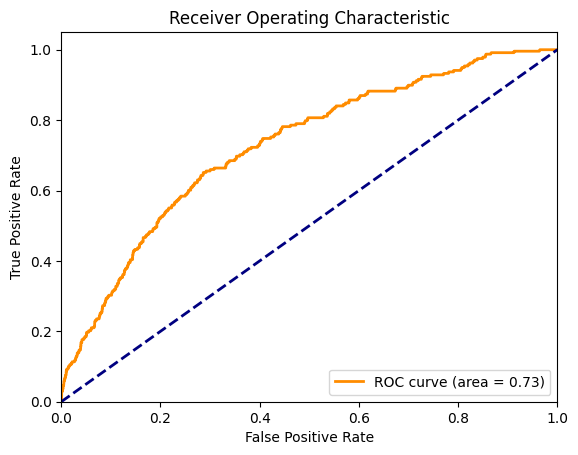

In [151]:
# performance on testing data
get_metrics(y_pred_eec)
get_plot(y_prob_eec)

##Logistic Regression with 隨機欠取樣

In [144]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

pipeline = Pipeline([
    ('under', rus),
    ('logreg', LR)
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'saga']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=skf, scoring='recall', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Recall Score: {grid_search.best_score_:.4f}')

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_LR = best_model.predict(X_test)

Best Parameters: {'logreg__C': 0.01, 'logreg__solver': 'liblinear'}
Best Recall Score: 0.7069


Accuracy: 0.64825
Confusion Matrix:
 [[2432 1330]
 [  77  161]]
Precision: 0.107981220657277
Recall: 0.6764705882352942
F1 Score: 0.1862348178137652
ROC AUC Score: 0.7152864335526874


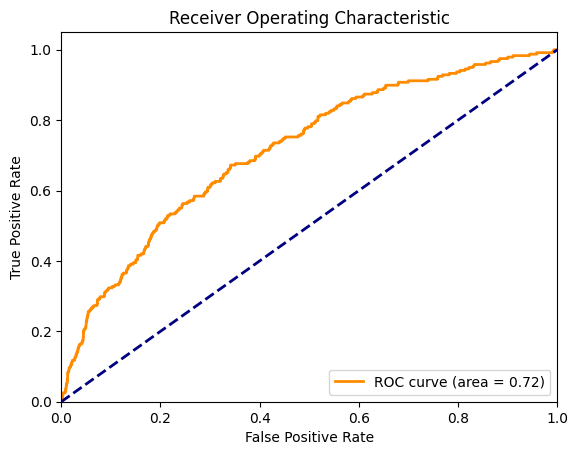

In [145]:
get_metrics(y_pred_LR)

# Predict probabilities for the positive class
y_prob_LR = best_model.predict_proba(X_test)[:, 1]

get_plot(y_prob_LR)

##XGBoost with 隨機欠取樣

In [146]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

pipeline = Pipeline([
    ('under', rus),
    ('xgb', xgb)
])

param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__max_depth': [3, 5, 7],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=skf, scoring='recall', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Recall Score: {grid_search.best_score_:.4f}')

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_xgb = best_model.predict(X_test)


Best Parameters: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 50}
Best Recall Score: 0.7182


Accuracy: 0.65725
Confusion Matrix:
 [[2469 1293]
 [  78  160]]
Precision: 0.11011699931176876
Recall: 0.6722689075630253
F1 Score: 0.18923713778829096
ROC AUC Score: 0.69850819115525


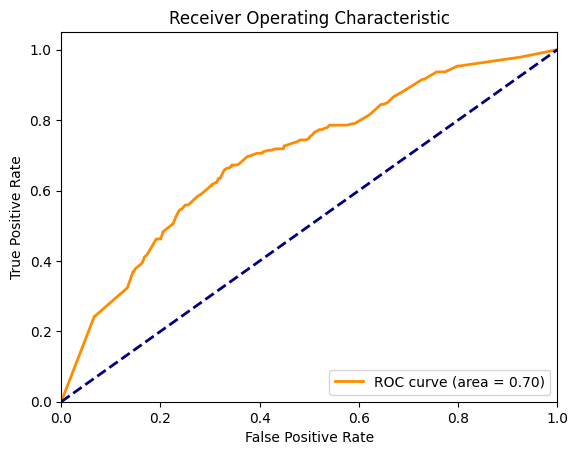

In [147]:
get_metrics(y_pred_xgb)

# Predict probabilities for the positive class
y_prob_xgb = best_model.predict_proba(X_test)[:, 1]

get_plot(y_prob_xgb)

## Random Forest with 隨機欠採樣

In [148]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

pipeline = Pipeline([
    ('under', rus),
    ('rf', RF)
])

param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=skf, scoring='recall', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Recall Score: {grid_search.best_score_:.4f}')

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_rf = best_model.predict(X_test)

Best Parameters: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Best Recall Score: 0.6952


Accuracy: 0.6615
Confusion Matrix:
 [[2496 1266]
 [  88  150]]
Precision: 0.1059322033898305
Recall: 0.6302521008403361
F1 Score: 0.18137847642079807
ROC AUC Score: 0.7161285566858323


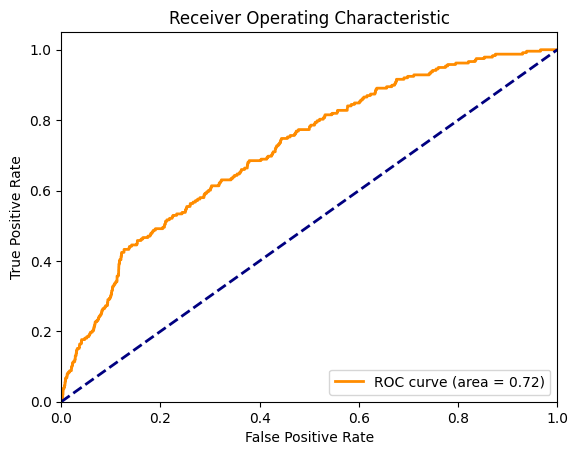

In [149]:
get_metrics(y_pred_rf)

# Predict probabilities for the positive class
y_prob_rf = best_model.predict_proba(X_test)[:, 1]

get_plot(y_prob_rf)

#取得特徵重要性

In [178]:
from sklearn.inspection import permutation_importance

# 使用permutation importance計算特徵重要性
result = permutation_importance(eec_best_model, X_test, y_test, n_repeats=5, random_state=42, scoring='recall')

# 獲取特徵重要性
feature_importance = result.importances_mean

# 加上特徵名稱
feature_names = X_train.columns
importance_dict = dict(zip(feature_names, feature_importance))

# 按重要性排序
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

print("重要特徵排序:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

重要特徵排序:
Contribution car policies: 0.1983193277310924
Contribution fire policies: 0.06302521008403358
Average income: 0.011764705882352922
Income less than 30.000: 0.01092436974789912
1 car: 0.010084033613445342
Farmer: 0.00588235294117645
Customer Subtype_8: 0.00588235294117645
Lower level education: 0.005042016806722671
Protestant: 0.004201680672268893
Married: 0.004201680672268893
2 cars: 0.0025210084033613356
Customer main type_10: 0.0025210084033613356
Roman catholic: 0.001680672268907557
Skilled labourers: 0.001680672268907557
No car: 0.001680672268907557
No religion: 0.0008403361344537785
Living together: 0.0008403361344537785
High level education: 0.0008403361344537785
Income more than 123.000: 0.0008403361344537785
Purchasing power class: 0.0008403361344537785
Contribution third party insurance (agriculture): 0.0008403361344537785
Contribution moped policies: 0.0008403361344537785
Number of third party insurance (agriculture): 0.0008403361344537785
Customer Subtype_35: 0.00084

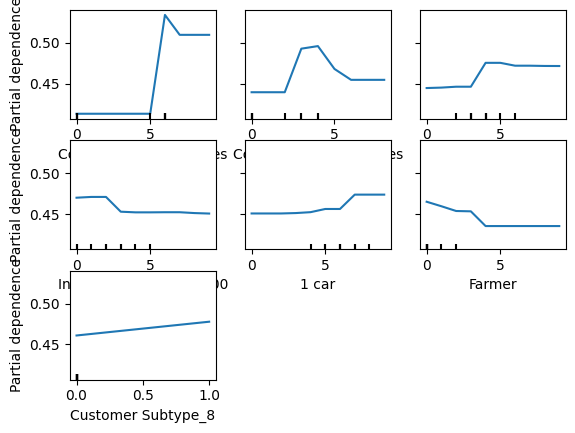

In [180]:
# 繪製Partial Dependence Plots
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

important_features = ['Contribution car policies', 'Contribution fire policies', 'Average income', 'Income less than 30.000',
                      '1 car', 'Farmer', 'Customer Subtype_8']

PartialDependenceDisplay.from_estimator(eec_best_model, X_test, features=important_features, grid_resolution=50)

plt.show()

#刪除不重要特徵後，重新跑一次模型

In [202]:
selected_features = ['Contribution car policies', 'Contribution fire policies', 'Average income','Income less than 30.000',
    '1 car',
    'Farmer',
    'Customer Subtype_8',
    'Lower level education',
    'Protestant',
    'Married',
    '2 cars',
    'Customer main type_10',
    'Roman catholic',
    'Skilled labourers',
    'No car',
    'No religion',
    'Living together',
    'High level education',
    'Income more than 123.000',
    'Purchasing power class',
    'Contribution third party insurance (agriculture)',
    'Contribution moped policies',
    'Number of third party insurance (agriculture)',
    'Customer Subtype_35',
    'Customer main type_5',
    'Middle management'
]

selected_X_train = X_train[selected_features]
selected_X_test = X_test[selected_features]

Best Parameters: {'n_estimators': 50, 'sampling_strategy': 'auto'}
Best Recall Score: 0.7241
Accuracy: 0.6745
Confusion Matrix:
 [[2537 1225]
 [  77  161]]
Precision: 0.11616161616161616
Recall: 0.6764705882352942
F1 Score: 0.19827586206896552
ROC AUC Score: 0.7250763941940414


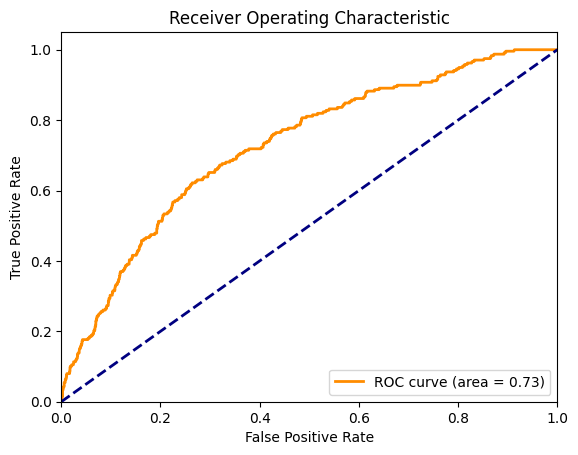

In [203]:
from sklearn.model_selection import GridSearchCV

eec = EasyEnsembleClassifier(random_state=24)

param_grid = {
    'n_estimators': [10, 50],
    'sampling_strategy': ['auto', 0.5, 0.75],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Set GridSearchCV
grid_search = GridSearchCV(estimator=eec, param_grid=param_grid, cv=skf, scoring='recall', n_jobs=-1)

# Search
grid_search.fit(selected_X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Recall Score: {grid_search.best_score_:.4f}')

# get the best model
eec_best_model = grid_search.best_estimator_
eec_best_model.fit(selected_X_train, y_train)

# test on testing dataset
y_pred_eec = eec_best_model.predict(selected_X_test)

# Predict probabilities for the positive class
y_prob_eec = eec_best_model.predict_proba(selected_X_test)[:, 1]

# performance on testing data
get_metrics(y_pred_eec)
get_plot(y_prob_eec)

In [205]:
from sklearn.inspection import permutation_importance

# 使用permutation importance計算特徵重要性
result = permutation_importance(eec_best_model, selected_X_test, y_test, n_repeats=5, random_state=42, scoring='recall')

# 獲取特徵重要性
feature_importance = result.importances_mean

# 加上特徵名稱
feature_names = selected_X_train.columns
importance_dict = dict(zip(feature_names, feature_importance))

# 按重要性排序
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

print("重要特徵排序:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

重要特徵排序:
Contribution car policies: 0.1974789915966387
Contribution fire policies: 0.06722689075630259
1 car: 0.020168067226890796
High level education: 0.015126050420168125
Lower level education: 0.012605042016806766
Average income: 0.012605042016806744
Farmer: 0.01092436974789921
Skilled labourers: 0.005042016806722694
No car: 0.005042016806722694
Middle management: 0.004201680672268915
Customer main type_10: 0.0033613445378151362
No religion: 0.003361344537815114
Purchasing power class: 0.0025210084033613356
Contribution moped policies: 0.0025210084033613356
Customer Subtype_8: 0.001680672268907557
Income less than 30.000: 0.0008403361344538008
Roman catholic: 0.0008403361344537785
Income more than 123.000: 0.0008403361344537785
Customer main type_5: 0.0008403361344537785
Protestant: 0.0
2 cars: 0.0
Living together: 0.0
Contribution third party insurance (agriculture): 0.0
Number of third party insurance (agriculture): 0.0
Customer Subtype_35: 0.0
Married: -0.0008403361344537785


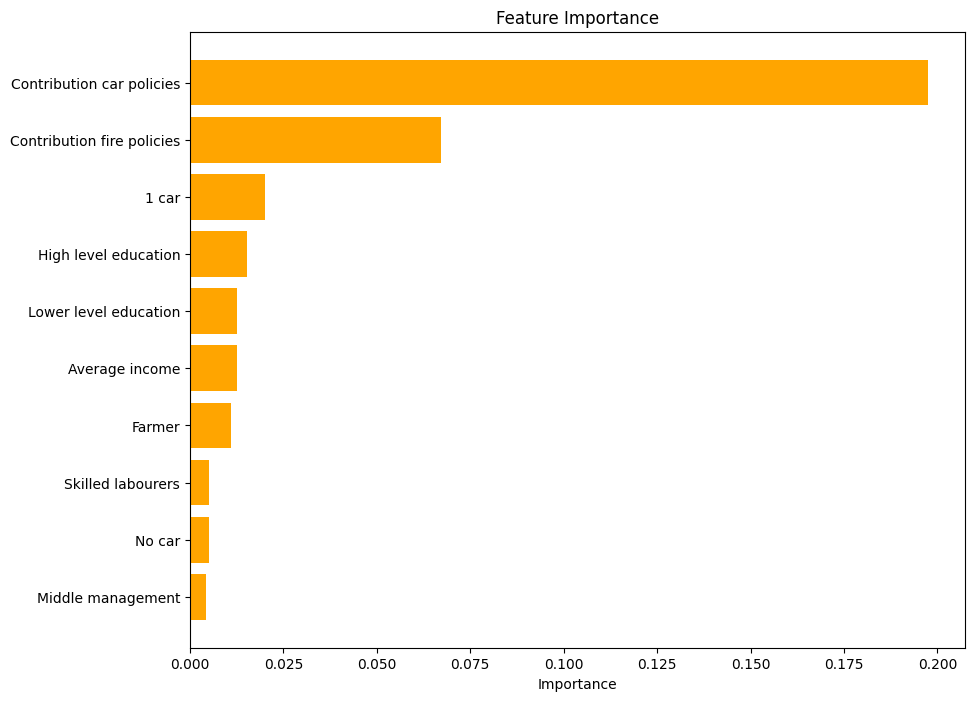

In [207]:
# 拆分成特徵名稱和重要性
features = [item[0] for item in sorted_importance[:10]]
importances = [item[1] for item in sorted_importance[:10]]

# bar chart
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

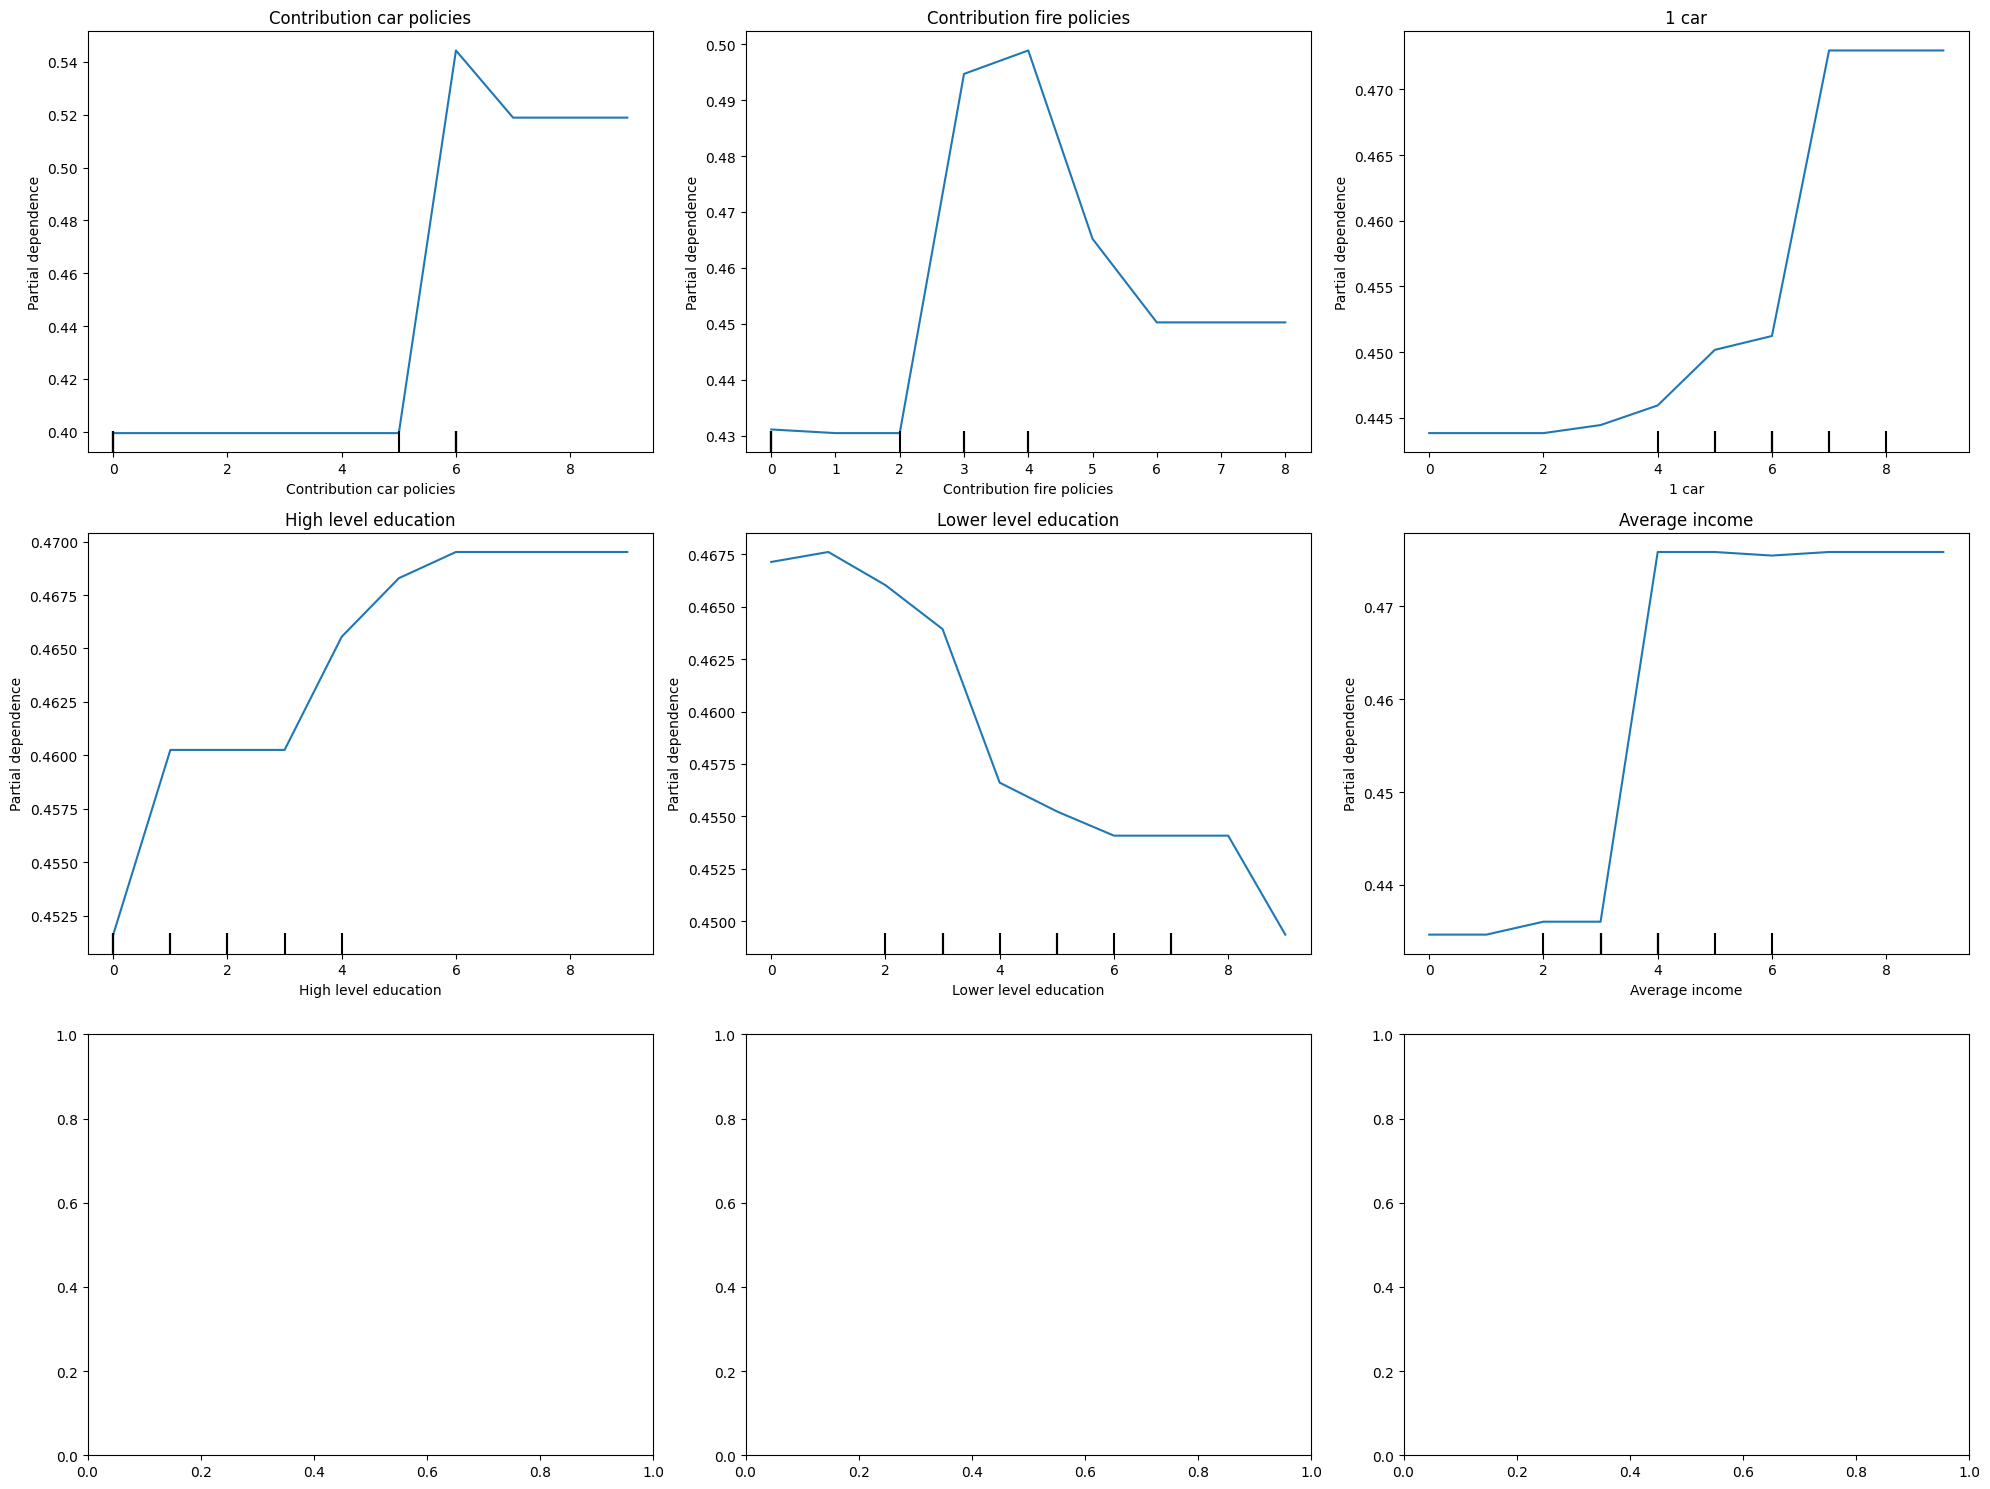

In [208]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

important_features = ['Contribution car policies', 'Contribution fire policies', '1 car', 'High level education', 'Lower level education', 'Average income']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(important_features):
    display = PartialDependenceDisplay.from_estimator(
        eec_best_model,
        selected_X_test,
        features=[feature],
        grid_resolution=100,
        ax=axes[i],
        random_state=42
    )

    axes[i].set_ylim(0.4, 0.55)
    axes[i].set_yticks([0.4, 0.45, 0.5, 0.55])
    axes[i].set_ylabel('Partial dependence')
    axes[i].set_title(feature)

plt.tight_layout()

plt.show()